# NDX Animation creation 

NDX image volumes are MASSIVE so trying a different approach for making movies.

In [134]:
import napari
from macrohet import dataio, tile, visualise
from macrohet import tile2
import btrack
print(btrack.__version__)
import os, glob
import dask.array as da

0.6.1


### Load experiment of choice

The Opera Phenix is a high-throughput confocal microscope that acquires very large 5-dimensional (TCZXY) images over several fields of view in any one experiment. Therefore, a lazy-loading approach is chosen to mosaic, view and annotate these images. This approach depends upon Dask and DaskFusion. The first step is to load the main metadata file (typically called `Index.idx.xml` and located in the main `Images` directory) that contains the image filenames and associated TCXZY information used to organise the images.

In [199]:
importlib.reload(tile2)

<module 'macrohet.tile2' from '/home/dayn/analysis/macrohet/macrohet/tile2.py'>

In [201]:
%%time
# image_dir = os.path.join(base_dir, 'macrohet_images/Images_8bit')
image_dir = os.path.join(base_dir, 'Images')
images = tile2.compile_mosaic(image_dir, 
                             metadata, 
                             row, column, 
                             set_plane = 'max_proj', #set_plane=1,#'max_proj',
                             # set_channel=1,
                             # set_time = 1,
#                             input_transforms = [input_transforms]
                            )

INFO:root:Entering function: compile_mosaic
 Parameters: row, col, plane, channel, time (2, 10, 'max_proj', None, None) 


Stitching images together:   0%|          | 0/3384 [00:00<?, ?it/s]

CPU times: user 3.38 s, sys: 0 ns, total: 3.38 s
Wall time: 3.36 s


In [153]:
base_dir = '/mnt/DATA/macrohet/macrohet_images/ND0000/'
# base_dir = '/run/user/30046150/gvfs/smb-share:server=data2.thecrick.org,share=lab-gutierrezm/home/users/dayn/macrohet_nemo/macrohet_images/NDXXXX_optimisation/ND0000__2023-08-04T15_27_41-Measurement 1/'
# base_dir = '/Volumes/lab-gutierrezm/home/users/dayn/macrohet_nemo/macrohet_images/NDXXXX_optimisation/ND0000__2023-08-04T15_27_41-Measurement 1/'
# metadata_fn = os.path.join(base_dir, 'macrohet_images/Index.idx.xml')
metadata_fn = os.path.join(base_dir, 'Images/Index.idx.xml')
metadata = dataio.read_harmony_metadata(metadata_fn)  
metadata

Reading metadata XML file...


Extracting HarmonyV5 metadata:   0%|          | 0/243648 [00:00<?, ?it/s]

Extracting metadata complete!


id State                               URL Row Col  \
0         0203K1F1P1R1    Ok    r02c03f01p01-ch1sk1fk1fl1.tiff   2   3   
1         0203K1F1P1R2    Ok    r02c03f01p01-ch2sk1fk1fl1.tiff   2   3   
2         0203K1F1P1R3    Ok    r02c03f01p01-ch3sk1fk1fl1.tiff   2   3   
3         0203K1F1P2R1    Ok    r02c03f01p02-ch1sk1fk1fl1.tiff   2   3   
4         0203K1F1P2R2    Ok    r02c03f01p02-ch2sk1fk1fl1.tiff   2   3   
...                ...   ...                               ...  ..  ..   
243643  0310K376F9P2R2    Ok  r03c10f09p02-ch2sk376fk1fl1.tiff   3  10   
243644  0310K376F9P2R3    Ok  r03c10f09p02-ch3sk376fk1fl1.tiff   3  10   
243645  0310K376F9P3R1    Ok  r03c10f09p03-ch1sk376fk1fl1.tiff   3  10   
243646  0310K376F9P3R2    Ok  r03c10f09p03-ch2sk376fk1fl1.tiff   3  10   
243647  0310K376F9P3R3    Ok  r03c10f09p03-ch3sk376fk1fl1.tiff   3  10   

       FieldID PlaneID TimepointID ChannelID FlimID  ... PositionZ  \
0            1       1           0         1      1  ...         0   
1            1       1           0         2      1  ...         0   
2            1       1           0         3      1  ...         0   
3            1       2           0         1      1  ...     2E-06   
4            1       2           0         2      1  ...     2E-06   
...        ...     ...         ...       ...    ...  ...       ...   
243643       9       2         375         2      1  ...     2E-06   
243644       9       2         375         3      1  ...     2E-06   
243645       9       3         375         1      1  ...     4E-06   
243646       9       3         375         2      1  ...     4E-06   
243647       9       3         375         3      1  ...     4E-06   

       AbsPositionZ MeasurementTimeOffset                        AbsTime  \
0       0.135205805                     0    2023-08-04T15:28:16.5+01:00   
1       0.135205805                     0    2023-08-04T15:28:16.5+01:00   
2       0.135205805                     0  2023-08-04T15:28:16.767+01:00   
3       0.135207802                     0  2023-08-04T15:28:17.047+01:00   
4       0.135207802                     0  2023-08-04T15:28:17.047+01:00   
...             ...                   ...                            ...   
243643  0.135064006            337503.973  2023-08-08T13:15:47.533+01:00   
243644  0.135064006            337503.973    2023-08-08T13:15:47.8+01:00   
243645  0.135066003            337503.973   2023-08-08T13:15:48.08+01:00   
243646  0.135066003            337503.973  2023-08-08T13:15:48.097+01:00   
243647  0.135066003            337503.973   2023-08-08T13:15:48.36+01:00   

       MainExcitationWavelength MainEmissionWavelength ObjectiveMagnification  \
0                           561                    599                     40   
1                           740                      0                     40   
2                           640                    706                     40   
3                           561                    599                     40   
4                           740                      0                     40   
...                         ...                    ...                    ...   
243643                      740                      0                     40   
243644                      640                    706                     40   
243645                      561                    599                     40   
243646                      740                      0                     40   
243647                      640                    706                     40   

       ObjectiveNA ExposureTime  \
0              1.1          0.2   
1              1.1          0.2   
2              1.1          0.2   
3              1.1          0.2   
4              1.1          0.2   
...            ...          ...   
243643         1.1          0.2   
243644         1.1          0.2   
243645         1.1          0.2   
243646         1.1          0.2   
243647         1.1 

### View assay layout and mask information (optional)

The Opera Phenix acquires many time lapse series from a range of positions. The first step is to inspect the image metadata, presented in the form of an `Assaylayout/experiment_ID.xml` file, to show which positions correspond to which experimental assays.

In [4]:
# metadata_path = os.path.join(base_dir, 'macrohet_images/Assaylayout/20210602_Live_cell_IPSDMGFP_ATB.xml')
metadata_path = glob.glob(os.path.join(base_dir, 'Assaylayout/*.xml'))[0]
assay_layout = dataio.read_harmony_metadata(metadata_path, assay_layout=True,)# mask_exist=True,  image_dir = image_dir, image_metadata = metadata)
# TEMP FIX FOR BUG IN ASSAY LAYOUT READER - ends up displaying more rows cols then there are so
assay_layout = assay_layout.loc[[idx for idx in assay_layout.index if str(idx[0]) in list(metadata['Row'].unique()) and str(idx[1]) in list(metadata['Col'].unique())]]
assay_layout

Reading metadata XML file...
Extracting metadata complete!


Cell Count double Staining Infection
2 3          NaN  50000    False     False
  4          NaN  50000    False      True
  9          NaN  50000     True     False
  10         NaN  50000     True      True
3 3          NaN  25000    False     False
  4          NaN  25000    False      True
  9          NaN  25000     True     False
  10         NaN  25000     True      True

### Define row and column of choice

In [158]:
row = 2
column = col = 10

### Now to lazily mosaic the images using Dask prior to viewing them.

1x (75,2,3) [TCZ] image stack takes approximately 1 minute to stitch together, so only load the one field of view I want.

In [87]:
%%time
base_dir = '/run/user/30046150/gvfs/smb-share:server=data2.thecrick.org,share=lab-gutierrezm/home/users/dayn/macrohet_nemo/macrohet_images/ND0000/'
image_dir = os.path.join(base_dir, 'Images')
images = tile.compile_mosaic(image_dir, 
                             metadata, 
                             row, column, 
                             set_plane=1,#'max_proj',
                             set_channel=1,
                             set_time = 1,
#                             input_transforms = [input_transforms]
                            ).compute().compute()

CPU times: user 23.8 s, sys: 3.99 s, total: 27.8 s
Wall time: 10.6 s


### Tiling from a locally stored set of images seems to be almost twice as fast?

In [5]:
base_dir

'/mnt/DATA/macrohet/macrohet_images/ND0000/'

In [231]:
%%time
# image_dir = os.path.join(base_dir, 'macrohet_images/Images_8bit')
image_dir = os.path.join(base_dir, 'Images')
images = tile.compile_mosaic(image_dir, 
                             metadata, 
                             row, column, 
                             set_plane = 'max_proj', #set_plane=1,#'max_proj',
                             set_channel=3,
                             # set_time = 1,
#                             input_transforms = [input_transforms]
                            )

CPU times: user 2.49 s, sys: 204 ms, total: 2.69 s
Wall time: 2.69 s


In [233]:
images

dask.array<amax-aggregate, shape=(376, 1, 6048, 6048), dtype=uint16, chunksize=(1, 1, 2016, 2016), chunktype=numpy.ndarray>

# Save out as single gfp frames

In [223]:
from skimage import io
from tqdm.auto import tqdm

In [ ]:
for t in tqdm(range(len(images)), total = 376):
    io.imsave(f'/mnt/DATA/macrohet/macrohet_images/ND0000/tiff/2,10/rfp/rfp_t{t}.tiff', images[t,0].compute().compute())

  0%|          | 0/376 [00:00<?, ?it/s]

/tmp/ipykernel_131618/1183162228.py:2: UserWarning: /mnt/DATA/macrohet/macrohet_images/ND0000/tiff/2,10/rfp/rfp_t0.tiff is a low contrast image
  io.imsave(f'/mnt/DATA/macrohet/macrohet_images/ND0000/tiff/2,10/rfp/rfp_t{t}.tiff', images[t,0].compute().compute())
/tmp/ipykernel_131618/1183162228.py:2: UserWarning: /mnt/DATA/macrohet/macrohet_images/ND0000/tiff/2,10/rfp/rfp_t1.tiff is a low contrast image
  io.imsave(f'/mnt/DATA/macrohet/macrohet_images/ND0000/tiff/2,10/rfp/rfp_t{t}.tiff', images[t,0].compute().compute())
/tmp/ipykernel_131618/1183162228.py:2: UserWarning: /mnt/DATA/macrohet/macrohet_images/ND0000/tiff/2,10/rfp/rfp_t2.tiff is a low contrast image
  io.imsave(f'/mnt/DATA/macrohet/macrohet_images/ND0000/tiff/2,10/rfp/rfp_t{t}.tiff', images[t,0].compute().compute())
/tmp/ipykernel_131618/1183162228.py:2: UserWarning: /mnt/DATA/macrohet/macrohet_images/ND0000/tiff/2,10/rfp/rfp_t3.tiff is a low contrast image
  io.imsave(f'/mnt/DATA/macrohet/macrohet_images/ND0000/tiff/2,10/r

In [228]:
frames = []
for t in tqdm(range(len(images)), total = 376):
    frame = io.imread(f'/mnt/DATA/macrohet/macrohet_images/ND0000/tiff/2,10/gfp_t{t}.tiff')
    frames.append(frame)
images = np.stack(frames, axis = 0)

  0%|          | 0/376 [00:00<?, ?it/s]

In [229]:
viewer = napari.Viewer()

viewer.add_image(images, )#channel_axis = 1)#, channel_axis = 1)

<Image layer 'images' at 0x7fb9393d26d0>

In [230]:
print()

In [17]:
%%time
images = images.compute().compute()

CPU times: user 1min 19s, sys: 4.5 s, total: 1min 23s
Wall time: 5.85 s


# Try saving locally 

In [35]:
from tqdm.auto import tqdm

In [36]:
for t in tqdm(range(376), total = 376):
    images = tile.compile_mosaic(image_dir, 
                                 metadata, 
                                 row, column, 
                                 # set_plane = 'max_proj', #set_plane=1,#'max_proj',
                                 # set_channel=1,
                                 set_time = t,
    #                             input_transforms = [input_transforms]
                                )
    images.compute().to_zarr(f'/mnt/DATA/macrohet/macrohet_images/ND0000/zarr/ND0000_e/t={t}.zarr', overwrite=True)

  0%|          | 0/376 [00:00<?, ?it/s]

ValueError: Axes must be different.

# It is clear that the compilation is failing on frame 118

In [37]:
t

118

In [42]:
images = tile.compile_mosaic(image_dir, 
                                 metadata, 
                                 row, column, 
                                 # set_plane = 'max_proj', #set_plane=1,#'max_proj',
                                 # set_channel=1,
                                 set_time = t,
    #                             input_transforms = [input_transforms]
                                )

In [43]:
%%time
images = images.compute().compute()

ValueError: Axes must be different.

In [48]:
row

2

In [55]:
fns = metadata[(metadata['TimepointID'] == '118') 
        &(metadata['Row'] == str(row))
        &(metadata['Col'] == str(col))
        ]['URL'].values

In [59]:
fns = [os.path.join(image_dir, fn) for fn in fns]

In [60]:
from skimage import io

In [64]:
imgs = []
rot_imgs = []
for fn in tqdm(fns):
    print(fn)
    img = io.imread(fn)
    imgs.append(img)
    rot_img = np.rot90(img)
    rot_imgs.append(rot_img)
imgs = np.stack(imgs, axis = 0)

  0%|          | 0/81 [00:00<?, ?it/s]

/mnt/DATA/macrohet/macrohet_images/ND0000/Images/r02c10f01p01-ch1sk119fk1fl1.tiff
/mnt/DATA/macrohet/macrohet_images/ND0000/Images/r02c10f01p01-ch2sk119fk1fl1.tiff
/mnt/DATA/macrohet/macrohet_images/ND0000/Images/r02c10f01p01-ch3sk119fk1fl1.tiff
/mnt/DATA/macrohet/macrohet_images/ND0000/Images/r02c10f01p02-ch1sk119fk1fl1.tiff
/mnt/DATA/macrohet/macrohet_images/ND0000/Images/r02c10f01p02-ch2sk119fk1fl1.tiff
/mnt/DATA/macrohet/macrohet_images/ND0000/Images/r02c10f01p02-ch3sk119fk1fl1.tiff
/mnt/DATA/macrohet/macrohet_images/ND0000/Images/r02c10f01p03-ch1sk119fk1fl1.tiff
/mnt/DATA/macrohet/macrohet_images/ND0000/Images/r02c10f01p03-ch2sk119fk1fl1.tiff
/mnt/DATA/macrohet/macrohet_images/ND0000/Images/r02c10f01p03-ch3sk119fk1fl1.tiff
/mnt/DATA/macrohet/macrohet_images/ND0000/Images/r02c10f02p01-ch1sk119fk1fl1.tiff
/mnt/DATA/macrohet/macrohet_images/ND0000/Images/r02c10f02p01-ch2sk119fk1fl1.tiff
/mnt/DATA/macrohet/macrohet_images/ND0000/Images/r02c10f02p01-ch3sk119fk1fl1.tiff
/mnt/DATA/macroh

ValueError: Axes must be different.

In [67]:
fn

'/mnt/DATA/macrohet/macrohet_images/ND0000/Images/r02c10f07p02-ch1sk119fk1fl1.tiff'

In [70]:
os.path.getsize(fn)

7602176

In [72]:
io.imread('/mnt/DATA/macrohet/macrohet_images/ND0000/Images/r02c10f07p02-ch1sk119fk1fl1.tiff')

array([[1692, 1730, 1789, ...,  122,  117,  118],
       [1787, 1853, 1903, ...,  113,  115,  117],
       [1963, 2024, 2033, ...,  114,  121,  123],
       ...,
       [ 117,  110,  109, ...,  106,  113,  118],
       [ 114,  117,  117, ...,  109,  113,  112],
       [ 119,  123,  126, ...,  111,  109,  112]], dtype=uint16)

In [71]:
io.imread('/run/user/30046150/gvfs/smb-share:server=data2.thecrick.org,share=lab-gutierrezm/home/users/dayn/macrohet_nemo/macrohet_images/ND0000/Images/r02c10f07p02-ch1sk119fk1fl1.tiff')

array([[1692, 1730, 1789, ...,  122,  117,  118],
       [1787, 1853, 1903, ...,  113,  115,  117],
       [1963, 2024, 2033, ...,  114,  121,  123],
       ...,
       [ 117,  110,  109, ...,  106,  113,  118],
       [ 114,  117,  117, ...,  109,  113,  112],
       [ 119,  123,  126, ...,  111,  109,  112]], dtype=uint16)

In [68]:
viewer = napari.Viewer()

viewer.add_image()

ValueError: Image data must have at least 2 dimensions.

### Test loading zarr

In [26]:
import zarr
import numpy as np

# Path to the Zarr dataset
zarr_path = "/mnt/DATA/macrohet/macrohet_images/ND0000/zarr/ND0000_c.zarr"

# Open the Zarr array
zarr_array = zarr.open(zarr_path, mode='r')

print("Zarr array info:", zarr_array.info)



Zarr array info: Type               : zarr.core.Array
Data type          : uint16
Shape              : (1, 1, 6048, 6048)
Chunk shape        : (1, 1, 2016, 2016)
Order              : C
Read-only          : True
Compressor         : Blosc(cname='lz4', clevel=5, shuffle=SHUFFLE, blocksize=0)
Store type         : zarr.storage.DirectoryStore
No. bytes          : 73156608 (69.8M)
No. bytes stored   : 50138190 (47.8M)
Storage ratio      : 1.5
Chunks initialized : 9/9



In [27]:
# Now you can access the image data using numpy-like slicing
# This does not load the entire volume into memory, but only the requested slice
slice = zarr_array[:, :, 0:1000, 0:1000,]  # Example: load a 10x10x10x10 sub-volume

# Convert to a NumPy array (if needed)
slice_numpy = np.array(slice)

print("Loaded image slice shape:", slice_numpy.shape)

Loaded image slice shape: (1, 1, 1000, 1000)


In [29]:
viewer = napari.Viewer()
viewer.add_image(zarr_array)

<Image layer 'zarr_array' at 0x7f196cea91f0>

### How long to load ten frames?

In [119]:
%%time
first_ten_frames = images[0:10,...].compute().compute()

CPU times: user 41min 13s, sys: 2min 42s, total: 43min 55s
Wall time: 1min 43s


#### Only GFP and RFP channel?

In [14]:
images = da.stack([images[:,0,...], images[:,2,...]], axis = 1)

In [15]:
images

dask.array<stack, shape=(376, 2, 6048, 6048), dtype=uint16, chunksize=(1, 1, 2016, 2016), chunktype=numpy.ndarray>

# Launch napari image viewer

In [16]:
%time
viewer = napari.Viewer(title = 'making animation')

viewer.add_image(images, 
                 channel_axis=1,
                 name=["macrophage actin", "mtb"],
                 colormap=["green",  "magenta"],
                 contrast_limits=[[0,6876], [0,1000]], 
                 # visible = True, 
                 scale = napari_scale
                 )

CPU times: user 5 µs, sys: 0 ns, total: 5 µs
Wall time: 11.7 µs


[<Image layer 'macrophage actin' at 0x7f0a120e4250>,
 <Image layer 'mtb' at 0x7f0b31b3d220>]

## Animate

In [17]:
from napari_animation import Animation

In [18]:
output_dir = '/mnt/DATA/macrohet/NDX_animation_dev/ND0000.2.10_v3'
os.makedirs(output_dir, exist_ok=True)

In [19]:
animation = Animation(viewer)

In [20]:
def update_slider(event):
    # only trigger if update comes from first axis (optional)
        #ind_lambda = viewer.dims.indices[0]
    time = viewer.dims.current_step[0] / (60/15)
    viewer.text_overlay.text = f"{time:1.2f} hours"
text_size = 24
napari_scale = [1.4949402023919043e-07, 1.4949402023919043e-07]


In [21]:
viewer.theme = 'dark'
viewer.scale_bar.visible = True
viewer.scale_bar.unit = 'm'
viewer.scale_bar.font_size = text_size
viewer.text_overlay.visible = True
viewer.text_overlay.color = 'white'
viewer.text_overlay.position = 'bottom_left'
viewer.text_overlay.font_size = text_size
viewer.dims.events.current_step.connect(update_slider)

<function __main__.update_slider(event)>

In [22]:
zoom = viewer.camera.zoom
cam_coords = viewer.camera.center
print(zoom, cam_coords)

882761.1767185754 (0.0, 0.00045199517018090773, 0.00045199517018090773)


In [23]:
from skimage.io import imsave, imshow
from tqdm.auto import tqdm

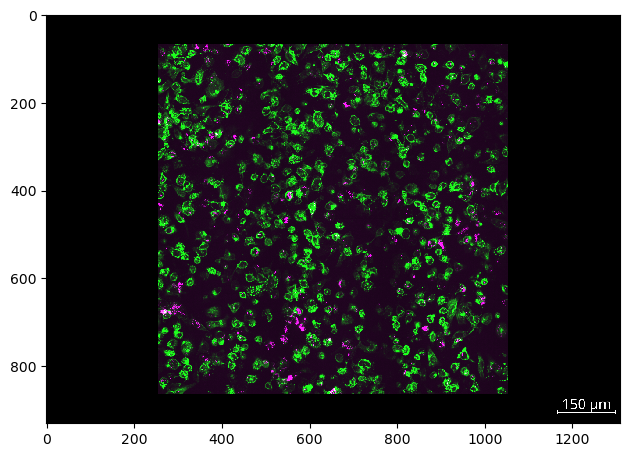

In [24]:
imshow(viewer.screenshot())

In [55]:
viewer.dims.current_step = (187, cam_coords[-2], cam_coords[-1])
viewer.camera.zoom = zoom#*0.95
fn = os.path.join('/home/dayn/test.png')
imsave(fn, viewer.screenshot())

In [25]:
### save image sequence
for t in tqdm(range(len(images)), desc = f'Saving animation'):
    fn = os.path.join(os.path.join(output_dir, f't_{t}.png'))
    if os.path.exists(fn):
        continue
    viewer.dims.current_step = (t, cam_coords[-2], cam_coords[-1])
    viewer.camera.zoom = zoom#*0.95
    imsave(fn, viewer.screenshot())
    animation.capture_keyframe(steps = 1)
animation.animate(os.path.join(output_dir, 'test_fullstack_labels_2.mp4'), canvas_only=True, fps = 20, quality = 9)

Saving animation:   0%|          | 0/376 [00:00<?, ?it/s]

<tifffile.TiffPages @7722912> invalid offset to first page 7722912
<tifffile.TiffPages @7722912> invalid offset to first page 7722912


ValueError: Axes must be different.

In [ ]:
### save image sequence
for t in tqdm(range(len(images)), desc = f'Saving animation'):
    fn = os.path.join(os.path.join(output_dir, f't_{t}.png'))
    if os.path.exists(fn):
        continue
    viewer.dims.current_step = (t, cam_coords[-2], cam_coords[-1])
    viewer.camera.zoom = zoom#*0.95
    imsave(fn, viewer.screenshot())
    animation.capture_keyframe(steps = 1)
animation.animate(os.path.join(output_dir, 'test_fullstack_labels.mp4'), canvas_only=True, fps = 20, quality = 9)

In [ ]:
from skimage.io import imread

In [37]:
imread('/run/user/30046150/gvfs/smb-share:server=data2.thecrick.org,share=lab-gutierrezm/home/users/dayn/macrohet_nemo/macrohet_images/NDXXXX_optimisation/ND0000__2023-08-04T15_27_41-Measurement 1/Images/r02c10f02p03-ch1sk18fk1fl1.tiff')

array([[ 108,  108,  117, ...,  877, 1012, 1282],
       [ 118,  111,  128, ...,  892, 1091, 1427],
       [ 111,  100,  117, ...,  876, 1071, 1447],
       ...,
       [ 656,  607,  573, ...,   98,  101,  103],
       [ 629,  617,  565, ...,  109,  112,  117],
       [ 587,  585,  554, ...,  101,  105,  107]], dtype=uint16)

In [ ]:
### save image sequence
for t in tqdm(range(len(images)), desc = f'Saving animation'):
    viewer.dims.current_step = (t, cam_coords[-2], cam_coords[-1])
    viewer.camera.zoom = zoom#*0.95
    fn = os.path.join(f'/home/dayn/ND0000_animation_test/t_{t}.png')
    imsave(fn, viewer.screenshot())
    animation.capture_keyframe(steps = 1)
animation.animate(os.path.join(output_dir, '3.9.test_fullstack_labels.mp4'), canvas_only=True, fps = 20, quality = 9)

In [20]:
# viewer.camera.center = (0, 3023.5, 3023.5)
viewer.dims.current_step = (0, 3023, 3023)
animation.capture_keyframe()
viewer.dims.current_step = (375, 3023, 3023)
animation.capture_keyframe(steps = 375)
animation.animate(os.path.join(output_dir, 'test_fullstack_labels.mp4'), canvas_only=True, fps = 20, quality = 9)

Rendering frames...


100%|███████████████████████████████████████████████████| 766/766 [6:31:43<00:00, 30.68s/it]


In [ ]:
from macrohet import notify

In [ ]:
notify.send_sms('two videos saved out')

In [ ]:
output_dir = '/run/user/30046150/gvfs/google-drive:host=gmail.com,user=nthndy/13iZkrWWM5tgb0r0IG-waR97cjBGOM8mi'

In [ ]:
animation = Animation(viewer)

In [ ]:
viewer.camera.center = (0, 3023.5, 3023.5)
viewer.dims.current_step = (0, 3023, 3023)
animation.capture_keyframe()
viewer.dims.current_step = (375, 3023, 3023)
animation.capture_keyframe(steps = 375)
animation.animate(os.path.join(output_dir, 'test_fullstack.mp4'), canvas_only=True, fps = 20, quality = 9)

In [ ]:
from macrohet import notify

In [ ]:
notify.send_sms('quick version complete online')

### Add additional annotations

In [25]:
visualise.highlight_cell(1251, viewer, tracks)

<Points layer 'cell 1251' at 0x7f235d482790>

In [62]:
viewer.add_tracks(napari_filtered_tracks, scale = (1,5.04,5.04),)

<Tracks layer 'napari_filtered_tracks [2]' at 0x7ff4e5a32430>

In [25]:
viewer.layers['napari_filtered_tracks'].scale = (30, 5.04, 5.04)

Traceback (most recent call last):
  File "/home/dayn/miniconda3/envs/aero/lib/python3.9/site-packages/napari/utils/action_manager.py", line 227, in <lambda>
    button.clicked.connect(lambda: self.trigger(name))
  File "/home/dayn/miniconda3/envs/aero/lib/python3.9/site-packages/napari/utils/action_manager.py", line 427, in trigger
    return self._actions[name].injected()
  File "/home/dayn/miniconda3/envs/aero/lib/python3.9/site-packages/in_n_out/_store.py", line 773, in _exec
    result = func(**{**_kwargs, **bound.arguments})
  File "/home/dayn/miniconda3/envs/aero/lib/python3.9/site-packages/napari/layers/image/_image_key_bindings.py", line 33, in orient_plane_normal_along_x
    orient_plane_normal_around_cursor(layer, plane_normal=(0, 0, 1))
  File "/home/dayn/miniconda3/envs/aero/lib/python3.9/site-packages/napari/layers/utils/interactivity_utils.py", line 126, in orient_plane_normal_around_cursor
    view_direction = layer._world_to_displayed_data_ray(
  File "/home/dayn/minic

In [32]:
viewer.layers['napari_filtered_tracks'].axis_labels=["time", "y", "x"]

In [29]:
viewer.add_tracks(ds_napari_tracks,
#                     properties=properties, 
#                     graph=graph, 
                    name="hacky downscaled tracks", 
                    blending="translucent",
                    visible=True,
#                     scale = (1,1,1)
                )
# viewer.add_labels(ds_segmentation, 
#                  name = 'downscaled segmentation')

viewer.add_labels(ds_col_segmentation, 
                  name = 'downscaled coloured segmentation',
                  scale=(1, 1, 1,), 
#                   color={1:'yellow'}
                 )

viewer.add_labels(ds_col_segmentation_new_tracks, 
                  name = 'downscaled coloured segmentation new tracks',
                  scale=(1, 1, 1,), 
#                   color={1:'yellow'}
                 )

<Labels layer 'downscaled coloured segmentation new tracks' at 0x7f15c273ca30>